In [2]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt

# Графики функции выплат

Пример 1. Постройте графики функции выплат для опционов колл (покупка, продажа) и пут (покупка, продажа).

In [3]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

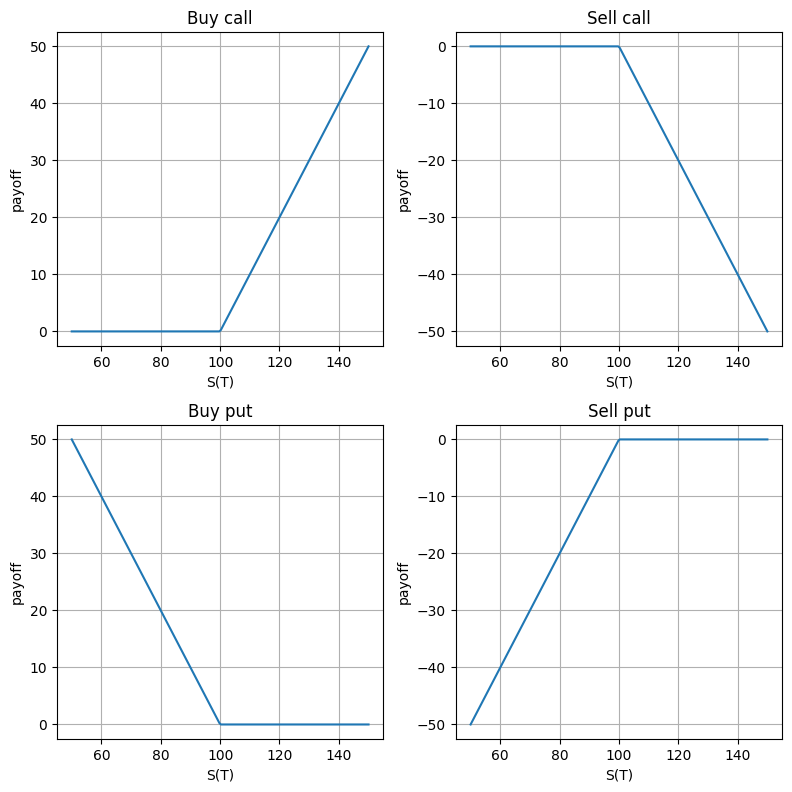

In [4]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## Задача (Collar)

  Допустим, что текущая цена базового актива равна 70.65, страйки опциона пут и колл равны 65 и 75 соответственно, а оценки их стоимости (премии) равны 2 и 3.25 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и продаже опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


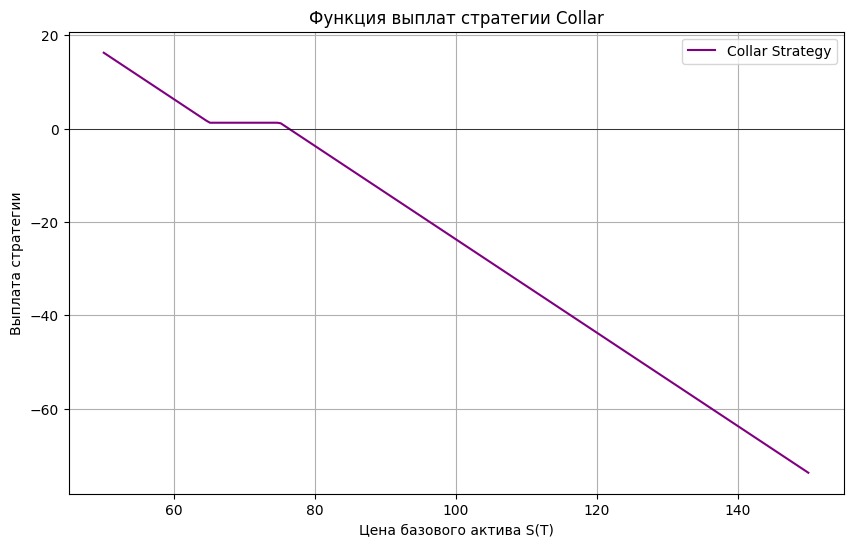

Стратегия Collar:
Максимальная прибыль: 11.25
Максимальный убыток: 66.25
Интервал безубыточности: от 66.25 до 76.25


In [5]:
def payoff_collar(S, K_put, premium_put, K_call, premium_call):
    long_put = payoff_buy_put(S, K_put) - premium_put
    short_call = payoff_sell_call(S, K_call) + premium_call
    return long_put + short_call

S0_collar = 70.65
K_put_collar = 65
premium_put_collar = 2
K_call_collar = 75
premium_call_collar = 3.25

S_collar = np.linspace(50, 150, 200)

payoff_collar_strategy = payoff_collar(S_collar, K_put_collar, premium_put_collar, K_call_collar, premium_call_collar)

plt.figure(figsize=(10,6))
plt.plot(S_collar, payoff_collar_strategy, label='Collar Strategy', color='purple')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Цена базового актива S(T)')
plt.ylabel('Выплата стратегии')
plt.title('Функция выплат стратегии Collar')
plt.grid(True)
plt.legend()
plt.show()

max_profit_collar = (K_call_collar - K_put_collar) + (premium_call_collar - premium_put_collar)
max_loss_collar = K_put_collar - premium_put_collar + premium_call_collar

print(f"Стратегия Collar:")
print(f"Максимальная прибыль: {max_profit_collar}")
print(f"Максимальный убыток: {max_loss_collar}")

break_even_low_collar = K_put_collar - (premium_put_collar - premium_call_collar)
break_even_high_collar = K_call_collar + (premium_call_collar - premium_put_collar)
print(f"Интервал безубыточности: от {break_even_low_collar} до {break_even_high_collar}")

## Задача (Long Straddle)

Допустим, что текущая цена базового актива равна 172.5, страйки опциона пут и колл однинаковые и равны 200, а премии опционов равны 29.25 и 0.04 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и покупке опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

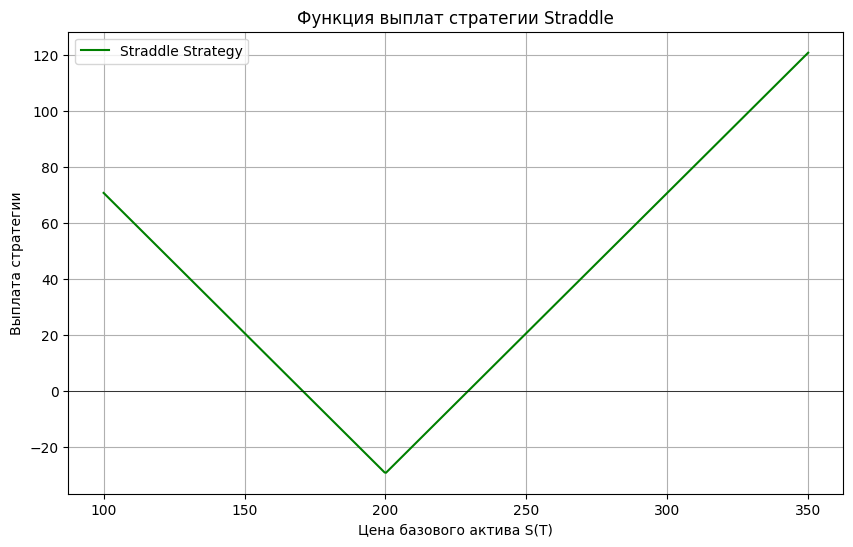


Стратегия Straddle:
Максимальная прибыль: Неограничена
Максимальный убыток: 29.29
Точки безубыточности: 170.71 и 229.29


In [6]:
def payoff_straddle(S, K_put, premium_put, K_call, premium_call):
    long_put = payoff_buy_put(S, K_put) - premium_put
    long_call = payoff_buy_call(S, K_call) - premium_call
    return long_put + long_call

S0_straddle = 172.5
K_put_straddle = 200
premium_put_straddle = 29.25
K_call_straddle = 200
premium_call_straddle = 0.04

S_straddle = np.linspace(100, 350, 500)

payoff_straddle_strategy = payoff_straddle(S_straddle, K_put_straddle, premium_put_straddle, K_call_straddle, premium_call_straddle)

plt.figure(figsize=(10,6))
plt.plot(S_straddle, payoff_straddle_strategy, label='Straddle Strategy', color='green')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Цена базового актива S(T)')
plt.ylabel('Выплата стратегии')
plt.title('Функция выплат стратегии Straddle')
plt.grid(True)
plt.legend()
plt.show()

max_profit_straddle = "Неограничена"
max_loss_straddle = premium_put_straddle + premium_call_straddle

print(f"\nСтратегия Straddle:")
print(f"Максимальная прибыль: {max_profit_straddle}")
print(f"Максимальный убыток: {max_loss_straddle}")

break_even_low_straddle = K_put_straddle - (premium_put_straddle + premium_call_straddle)
break_even_high_straddle = K_call_straddle + (premium_put_straddle + premium_call_straddle)
print(f"Точки безубыточности: {break_even_low_straddle} и {break_even_high_straddle}")

# Биноминальная модель

In [7]:
# plot_binomial_tree: visualisation of the tree and state prices
def plot_binomial_tree(statePrices):
    for i in range(0,n+1):
        for j in range(0,n+1):
            if j>i:
                break
            if i<n:
                x1, y1 = [i, i+1], [2*j-(i-1),2*j+1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="red")
                x1, y1 = [i, i+1], [2*j-(i-1),2*j-1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="black")
            plt.text(i-0.2,2*j-(i-1)-0.6,"%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2,2*j-(i-1)-1.0,"%.2f" % statePrices["underlying"][i][j],color="blue")
    plt.title("Биноминальное дерево")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                   statePrices["u"],
                                                                   statePrices["r"]*100,
                                                                   statePrices["q"]*100,
                                                                   statePrices["dt"]*365))
    plt.show()

In [8]:
# binomial_tree_pricer

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
# r: risk neutral rate
# q: dividend yield
# sigma: volatility
# T: maturity in years
# n: number of time steps
# S: spot stock price
# payoff: payoff function e.g.: lambda S: max(S-K,0)
# american: early exercise: True if american, otherwise European
# showStatePrices: print tree probabilities and state prices

    dt = T/n
    up  = np.exp(sigma*np.sqrt(dt))
    p0 = (up * np.exp((r-q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    # initial values at time T
    statePrices = {"p":p0, "u":up, "r":r, "q":q, "dt":dt}
    if showStatePrices:
        statePrices["payoff"]=np.zeros((n+1,n+1))
        statePrices["underlying"]=np.zeros((n+1,n+1))
    p = np.zeros(n+1)
    for i in range(n+1): # i from 0 to n incl
        p[i] = payoff(S * up**(2*i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2*i - n)
    # move to earlier times
    for j in range(n-1,-1,-1): # j from n-1 to 0 incl
        for i in range(j+1): # i from 0 to j incl
            # discounted expected value of exdiv price
            p[i] = (p0 * p[i+1] + p1 * p[i])*df
            # american payoff
            if american:
                early_exercise = payoff(S * up**(2*i - j))
                p[i] = max(early_exercise,p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2*i - j)
    if showStatePrices:
        plot_binomial_tree(statePrices)
    return p[0]

Пример. Текущая цена акций равна 50, волатильность 15%, цена страйк на 1% выше цены базового актива, время до экспирации 1 месяц, безрисковая ставка 5%, на акции начисляются дивиденды 2%. Постройте биноминальное дерево на 5 периодов для европейского опциона пут и оцените его стоимость.

Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)


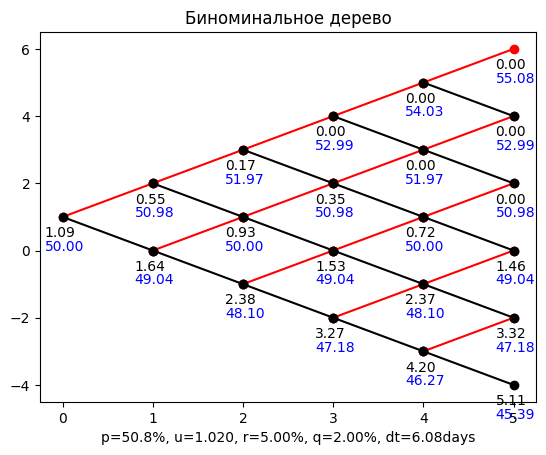

np.float64(1.0853174417962133)

In [9]:
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01
print("Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S,0), american=False, showStatePrices=True)

## Задача (дерево)

Задача. Постройте биноминальные деревья для
*   американского опциона колл,
*   американского опциона пут,
*   европейского опциона колл,
*   европейского опциона пут
и сделайте выводы.





Биноминальное дерево, European call опцион, функция выплат max(S-K, 0)


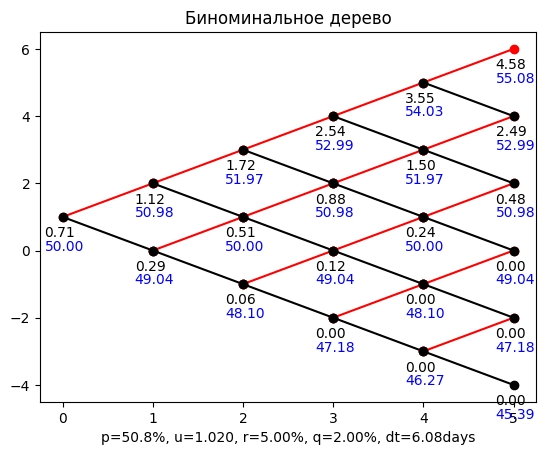

Стоимость european call опциона: 0.7120

Биноминальное дерево, American call опцион, функция выплат max(S-K, 0)


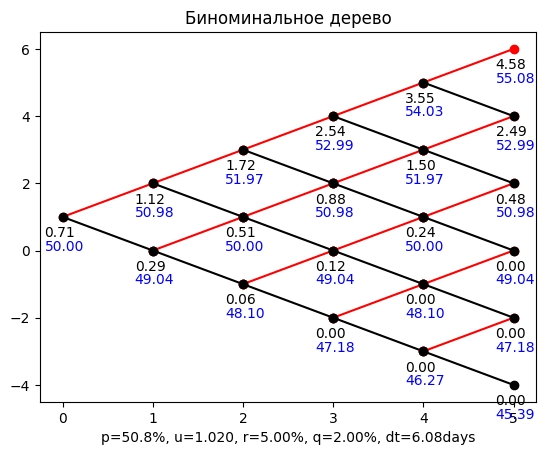

Стоимость american call опциона: 0.7120

Биноминальное дерево, European put опцион, функция выплат max(K-S, 0)


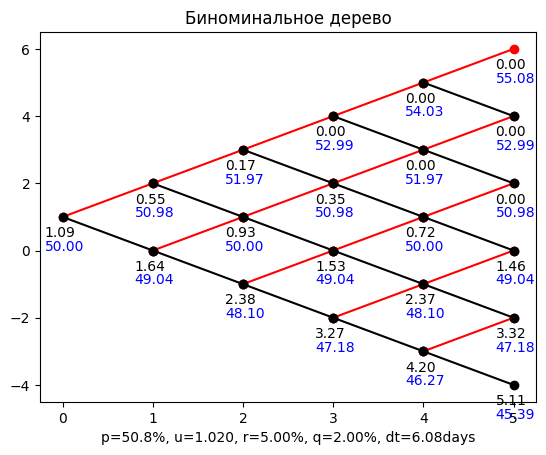

Стоимость european put опциона: 1.0853

Биноминальное дерево, American put опцион, функция выплат max(K-S, 0)


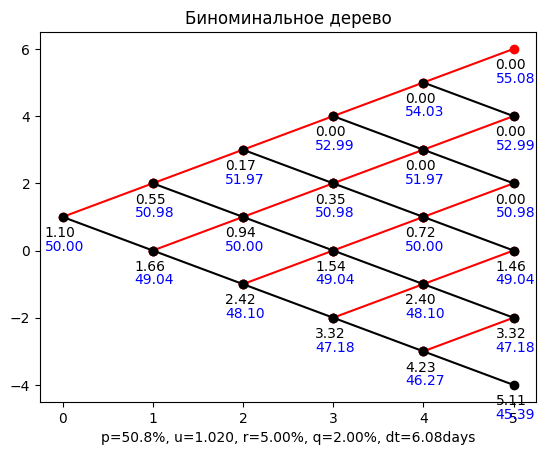

Стоимость american put опциона: 1.0963



In [10]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

def payoff_european_call(S, K):
    return np.maximum(S - K, 0)

def payoff_european_put(S, K):
    return np.maximum(K - S, 0)

def payoff_american_call(S, K):
    return np.maximum(S - K, 0)

def payoff_american_put(S, K):
    return np.maximum(K - S, 0)

def plot_binomial_tree(statePrices):
    n = len(statePrices["payoff"]) - 1
    for i in range(0, n+1):
        for j in range(0, n+1):
            if j > i:
                break
            if i < n:
                x1, y1 = [i, i+1], [2*j - (i-1), 2*j +1 - (i-1)]
                plt.plot(x1, y1, marker='o', color="red")
                x1, y1 = [i, i+1], [2*j - (i-1), 2*j -1 - (i-1)]
                plt.plot(x1, y1, marker='o', color="black")
            plt.text(i-0.2, 2*j - (i-1) - 0.6, "%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2, 2*j - (i-1) - 1.0, "%.2f" % statePrices["underlying"][i][j], color="blue")
    plt.title("Биноминальное дерево")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (
        statePrices["p"]*100,
        statePrices["u"],
        statePrices["r"]*100,
        statePrices["q"]*100,
        statePrices["dt"]*365))
    plt.show()

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
    # r: безрисковая ставка
    # q: дивидендная доходность
    # sigma: волатильность
    # T: время до экспирации в годах
    # n: количество периодов
    # S: спотовая цена
    # payoff: функция выплат, например: lambda S: max(S-K, 0)
    # american: True для американских опционов, иначе для европейских
    # showStatePrices: показывать вероятности и цены состояний
    
    dt = T / n
    up = np.exp(sigma * np.sqrt(dt))
    p0 = (up * np.exp((r - q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    
    statePrices = {"p": p0, "u": up, "r": r, "q": q, "dt": dt}
    
    if showStatePrices:
        statePrices["payoff"] = np.zeros((n+1, n+1))
        statePrices["underlying"] = np.zeros((n+1, n+1))
    
    p = np.zeros(n+1)
    for i in range(n+1):
        underlying_price = S * up**(2*i - n)
        p[i] = payoff(underlying_price)
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = underlying_price
    
    
    for j in range(n-1, -1, -1): 
        for i in range(j+1):  
            expected = (p0 * p[i+1] + p1 * p[i]) * df
            underlying_price = S * up**(2*i - j)
            exercise = payoff(underlying_price)
            if american:
                p[i] = max(exercise, expected)
            else:
                p[i] = expected
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = underlying_price
    
    if showStatePrices:
        plot_binomial_tree(statePrices)
    
    return p[0]


def evaluate_option(option_type, style, r, q, sigma, T, n, S, K):
    """
    Оценивает и визуализирует опцион с заданными параметрами.
    
    :param option_type: 'call' или 'put'
    :param style: 'american' или 'european'
    :param r: безрисковая ставка
    :param q: дивидендная доходность
    :param sigma: волатильность
    :param T: время до экспирации (в годах)
    :param n: количество периодов
    :param S: текущая цена актива
    :param K: цена страйк
    """
    if option_type == 'call' and style == 'european':
        payoff_func = lambda S: payoff_european_call(S, K)
    elif option_type == 'call' and style == 'american':
        payoff_func = lambda S: payoff_american_call(S, K)
    elif option_type == 'put' and style == 'european':
        payoff_func = lambda S: payoff_european_put(S, K)
    elif option_type == 'put' and style == 'american':
        payoff_func = lambda S: payoff_american_put(S, K)
    else:
        raise ValueError("Неверный тип опциона или стиль исполнения.")
    
    print(f"Биноминальное дерево, {style.capitalize()} {option_type} опцион, функция выплат max({'S-K' if option_type == 'call' else 'K-S'}, 0)")
    option_price = binomial_tree_pricer(r, q, sigma, T, n, S, payoff_func, 
                                       american=(style == 'american'), 
                                       showStatePrices=True)
    print(f"Стоимость {style} {option_type} опциона: {option_price:.4f}\n")

r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S * 1.01 

evaluate_option(option_type='call', style='european', r=r, q=q, sigma=sigma, T=T, n=n, S=S, K=K)
evaluate_option(option_type='call', style='american', r=r, q=q, sigma=sigma, T=T, n=n, S=S, K=K)
evaluate_option(option_type='put', style='european', r=r, q=q, sigma=sigma, T=T, n=n, S=S, K=K)
evaluate_option(option_type='put', style='american', r=r, q=q, sigma=sigma, T=T, n=n, S=S, K=K)


# Модель Блека-Шоулза

Задача. Допустим, что условия модели Блека-Шоулза выполнены. Текущая цена бездивидентных акций равна 100, волатальность
5%, цена страйк 100, время до экспирации один год, безрисковая
ставка 5%.

Оцените справедливую стоимость опционов колл и пут и вычислите греческие характеристики для опционов как функцию от текущей цены базового актива.

In [11]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

## Задача (оценка и паритет)

In [12]:
# оценка опциона колл
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

In [13]:
def put(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return put_price


In [14]:
# Оценка опциона пут с использованием паритета
def put_paritet(S, K, T, sigma, r, q):
    return call(S, K, T, sigma, r, q) + K * np.exp(-r * T) - S * np.exp(-q * T)


    Сравните результаты оценки опциона пут с/без паритета цен

In [15]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
print('Параметры:', params)

call_price = call(S0, K, T, sigma, r, q)
print('Оценка опциона колл =', call_price)

put_price = put(S0, K, T, sigma, r, q)
print('Оценка опциона пут =', put_price)

put_price_paritet = put_paritet(S0, K, T, sigma, r, q)
print('Оценка опциона пут через паритет =', put_price_paritet)

difference = abs(put_price - put_price_paritet)
print(f"Разница между прямой оценкой и паритетом: {difference:.10f}")

Параметры: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
Оценка опциона колл = 15.210500635727158
Оценка опциона пут = 8.449882626321987
Оценка опциона пут через паритет = 8.44988262632198
Разница между прямой оценкой и паритетом: 0.0000000000


In [16]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
print('Параметры:', params)

call_price = call(S0, K, T, sigma, r, q)
print('Оценка опциона колл =', call_price)
put_price  =  put(S0, K, T, sigma, r, q)
print('Оценка опциона пут =', put_price)

Параметры: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
Оценка опциона колл = 15.210500635727158
Оценка опциона пут = 8.449882626321987


## Задача (греческие характеристики)

Вспомогательные функции для аналитического вычисления греческих характеристик.

In [17]:
def delta_call(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return np.exp(-q * T) * norm.cdf(d1)

def delta_put(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return np.exp(-q * T) * (norm.cdf(d1) - 1)

def gamma(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return (np.exp(-q * T) * norm.pdf(d1)) / (S * sigma * np.sqrt(T))

def theta_call(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    term1 = - (S * sigma * np.exp(-q * T) * norm.pdf(d1)) / (2 * np.sqrt(T))
    term2 = - q * S * np.exp(-q * T) * norm.cdf(d1)
    term3 = q * K * np.exp(-r * T) * norm.cdf(d2)
    return term1 + term2 + term3

def theta_put(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    term1 = - (S * sigma * np.exp(-q * T) * norm.pdf(d1)) / (2 * np.sqrt(T))
    term2 = q * S * np.exp(-q * T) * norm.cdf(-d1)
    term3 = - r * K * np.exp(-r * T) * norm.cdf(-d2)
    return term1 + term2 + term3

def vega(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * np.exp(-q * T) * norm.pdf(d1) * np.sqrt(T)

def rho_call(S, K, T, sigma, r, q):
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return K * T * np.exp(-r * T) * norm.cdf(d2)

def rho_put(S, K, T, sigma, r, q):
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return -K * T * np.exp(-r * T) * norm.cdf(-d2)

Графики зависимости греческих характеристик для опционов от цены базового актива.

In [18]:
def delta(S, K, T, sigma, r, q, option_type='call'):
    if option_type == 'call':
        return delta_call(S, K, T, sigma, r, q)
    elif option_type == 'put':
        return delta_put(S, K, T, sigma, r, q)
    else:
        raise ValueError("option_type должен быть 'call' или 'put'")

def gamma_func(S, K, T, sigma, r, q):
    return gamma(S, K, T, sigma, r, q)

def theta(S, K, T, sigma, r, q, option_type='call'):
    if option_type == 'call':
        return theta_call(S, K, T, sigma, r, q)
    elif option_type == 'put':
        return theta_put(S, K, T, sigma, r, q)
    else:
        raise ValueError("option_type должен быть 'call' или 'put'")

def vega_func(S, K, T, sigma, r, q):
    return vega(S, K, T, sigma, r, q)

def ro(S, K, T, sigma, r, q, option_type='call'):
    if option_type == 'call':
        return rho_call(S, K, T, sigma, r, q)
    elif option_type == 'put':
        return rho_put(S, K, T, sigma, r, q)
    else:
        raise ValueError("option_type должен быть 'call' или 'put'")


In [19]:
r = 0.07      
T = 1         
K = 100     
S0 = 100     
sigma = 0.3   
t = 0          
q = 0        

N = 1000
x_data = np.linspace(S0 - S0/4, S0 + S0/4, N) 

# Инициализация массива греческих характеристик: 5 греческих, 2 типа опционов, N точек
cp_data = np.zeros((5, 2, N))  # [Greek][Option Type][S]

for i, S in enumerate(x_data):
    # Дельта
    cp_data[0, 0, i] = delta(S, K, T, sigma, r, q, option_type='call')  # Delta Call
    cp_data[0, 1, i] = delta(S, K, T, sigma, r, q, option_type='put')   # Delta Put
    
    # Гамма (одинакова для Call и Put)
    cp_data[1, 0, i] = gamma_func(S, K, T, sigma, r, q)                 # Gamma Call
    cp_data[1, 1, i] = gamma_func(S, K, T, sigma, r, q)                 # Gamma Put
    
    # Тета
    cp_data[2, 0, i] = theta(S, K, T, sigma, r, q, option_type='call') # Theta Call
    cp_data[2, 1, i] = theta(S, K, T, sigma, r, q, option_type='put')  # Theta Put
    
    # Вега (одинакова для Call и Put)
    cp_data[3, 0, i] = vega_func(S, K, T, sigma, r, q)                  # Vega Call
    cp_data[3, 1, i] = vega_func(S, K, T, sigma, r, q)                  # Vega Put
    
    # Ро
    cp_data[4, 0, i] = ro(S, K, T, sigma, r, q, option_type='call')    # Rho Call
    cp_data[4, 1, i] = ro(S, K, T, sigma, r, q, option_type='put')     # Rho Put


Задача. Вычислите греческие коэффициенты численно и сравните результаты.

```
def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)
```




In [20]:
def black_scholes_call(S, K, T, r, sigma):
    """
    Вычисляет цену европейского колл-опциона по модели Блэка-Шоулза.
    
    :param S: Цена базового актива
    :param K: Страйк опциона
    :param T: Время до экспирации (в годах)
    :param r: Безрисковая процентная ставка
    :param sigma: Волатильность базового актива
    :return: Цена колл-опциона
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


In [21]:
def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h ** 2)


In [22]:
def delta_black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def gamma_black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))


In [23]:
S = 100      
K = 100     
T = 1       
r = 0.05     
sigma = 0.2  

def option_price(S_var):
    return black_scholes_call(S_var, K, T, r, sigma)

numerical_delta = first_derivative(option_price, S)
numerical_gamma = second_derivative(option_price, S)


analytical_delta = delta_black_scholes_call(S, K, T, r, sigma)
analytical_gamma = gamma_black_scholes_call(S, K, T, r, sigma)


print(f"Численная дельта: {numerical_delta:.6f}")
print(f"Аналитическая дельта: {analytical_delta:.6f}")
print(f"Погрешность дельты: {abs(numerical_delta - analytical_delta):.6f}\n")

print(f"Численная гамма: {numerical_gamma:.6f}")
print(f"Аналитическая гамма: {analytical_gamma:.6f}")
print(f"Погрешность гаммы: {abs(numerical_gamma - analytical_gamma):.6f}")


Численная дельта: 0.636831
Аналитическая дельта: 0.636831
Погрешность дельты: 0.000000

Численная гамма: 0.018762
Аналитическая гамма: 0.018762
Погрешность гаммы: 0.000000


Задача. Постройте график трехмерной поверхности для описания зависимости греческих коэффициентов опциона  
*   кол,
*   пут

от стоимости базового актива и
количества дней до экспирации.

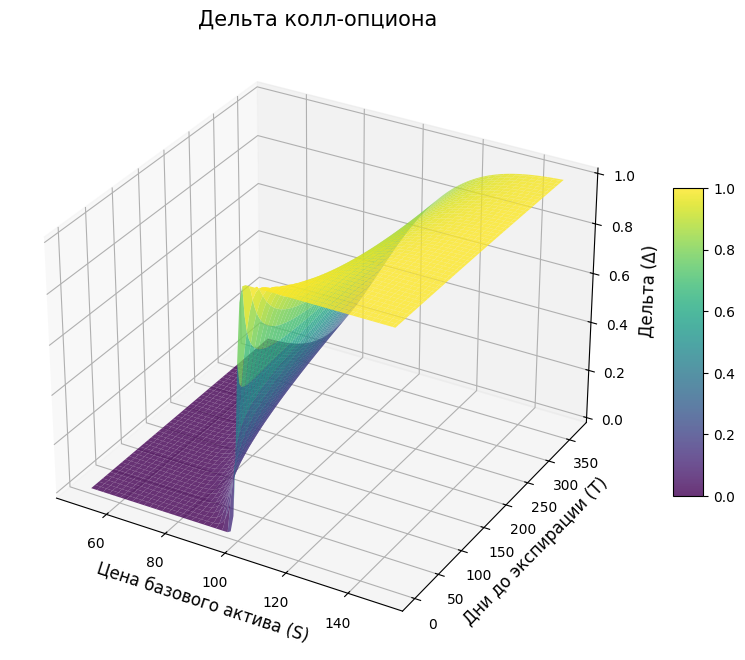

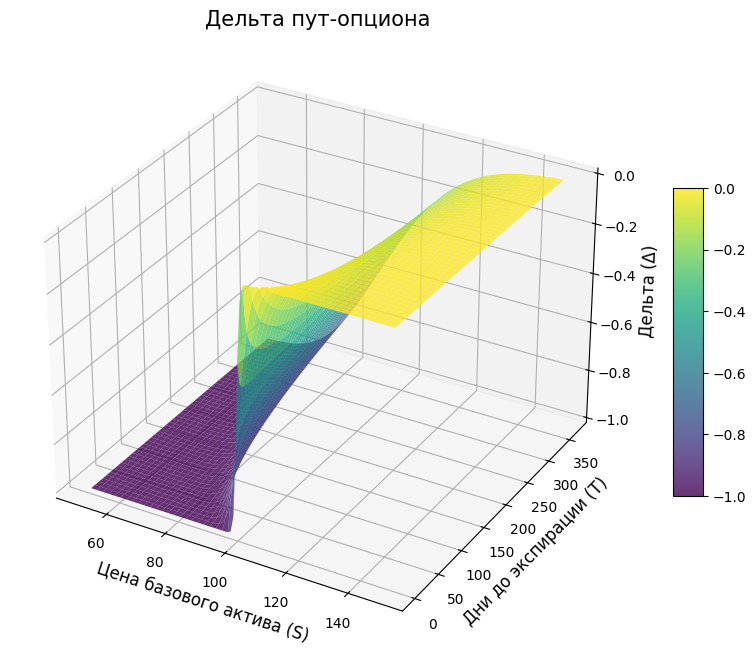

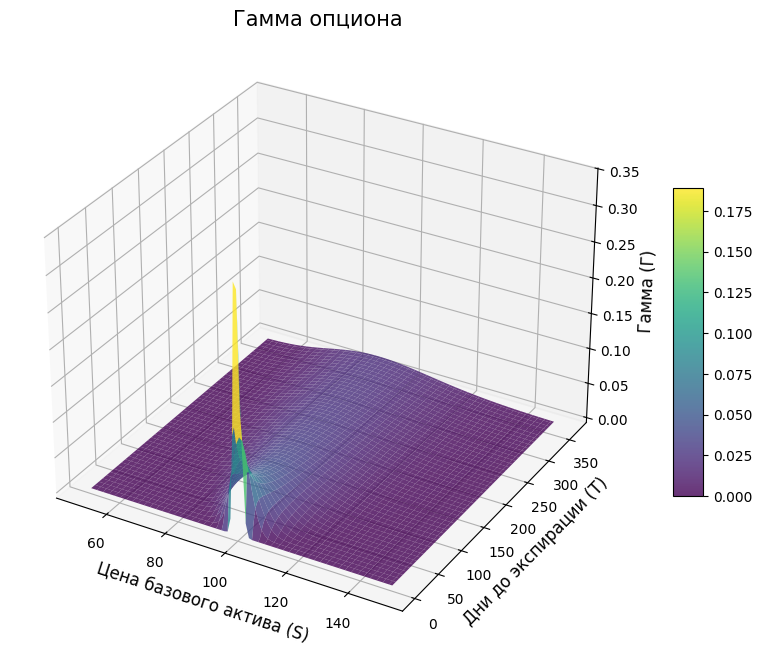

In [24]:
from mpl_toolkits.mplot3d import Axes3D

def black_scholes_put(S, K, T, r, sigma):
    """
    Вычисляет цену европейского пут-опциона по модели Блэка-Шоулза.

    :param S: Цена базового актива
    :param K: Страйк цена
    :param T: Время до экспирации (в годах)
    :param r: Безрисковая процентная ставка
    :param sigma: Волатильность базового актива
    :return: Цена пут-опциона
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

def delta_call(S, K, T, r, sigma):
    """
    Вычисляет дельту колл-опциона.

    :return: Дельта колл-опциона
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def delta_put(S, K, T, r, sigma):
    """
    Вычисляет дельту пут-опциона.

    :return: Дельта пут-опциона
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1) - 1

def gamma(S, K, T, r, sigma):
    """
    Вычисляет гамму опциона (одинакова для колл и пут).

    :return: Гамма опциона
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))


K = 100          
r = 0.05         
sigma = 0.2      


S_values = np.linspace(50, 150, 100) 

days_to_expiry = np.linspace(1, 365, 100)  
T_values = days_to_expiry / 365 

S, T = np.meshgrid(S_values, T_values)

delta_c = delta_call(S, K, T, r, sigma)
delta_p = delta_put(S, K, T, r, sigma)

gamma_option = gamma(S, K, T, r, sigma)

def plot_3d_surface(X, Y, Z, title, xlabel, ylabel, zlabel, cmap='viridis'):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='none', alpha=0.8)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_zlabel(zlabel, fontsize=12)
    fig.colorbar(surface, shrink=0.5, aspect=10)
    plt.show()


plot_3d_surface(S, T * 365, delta_c, 
                title='Дельта колл-опциона',
                xlabel='Цена базового актива (S)',
                ylabel='Дни до экспирации (T)',
                zlabel='Дельта (Δ)')

plot_3d_surface(S, T * 365, delta_p, 
                title='Дельта пут-опциона',
                xlabel='Цена базового актива (S)',
                ylabel='Дни до экспирации (T)',
                zlabel='Дельта (Δ)')


plot_3d_surface(S, T * 365, gamma_option, 
                title='Гамма опциона',
                xlabel='Цена базового актива (S)',
                ylabel='Дни до экспирации (T)',
                zlabel='Гамма (Γ)')


# Опционная стратегия

## Задача (по вариантам)

Задача. С использование досок опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) или [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) выберите ликвидный актив и реализуейте две [опционных стратегий](https://www.option.ru/glossary/strategy),
$i$ и $i+12$, где $i$ -- ваша фамилия по алфавиту:

1.   Покупка опциона колл. Long Call
1. Продажа опциона колл. Short Call
1. Покупка опциона пут. Long Put
1. Продажа опциона пут. Short Put
1. Бычий колл спрэд. Bull Call Spread
1. Бычий пут спрэд. Bull Put Spread
1. Медвежий колл спрэд. Bear Call Spread
1. Медвежий пут спрэд. Bear Put Spread
1. Покупка бабочки. Long Butterfly
1. Продажа бабочки. Short Butterfly
1. Покупка кондора. Long Condor
1. Продажа кондора. Short Condor
1. Покупка стрэддла. Long Straddle
1. Продажа стрэддла. Short Straddle
1. Покупка стрэнгла. Long Strangle
1. Продажа стрэнгла. Short Strangle
1. Пропорциональный колл спрэд. Call Ratio Spread
1. Пропорциональный пут спрэд. Put Ratio Spread
1. Пропорциональный обратный колл спрэд. Call Ratio Backspread
1. Пропорциональный обратный пут спрэд. Put Ratio Backspread
1. Синтетический длинный фьючерс. Synthetic Long Futures
1. Синтетический короткий фьючерс. Synthetic Short Futures
1. Стрэп. Strap
1. Стрип. Strip
1. Обратный бычий спрэд. Bull Backspread
1. Обратный медвежий спрэд. Bear Backspread

Проанализируйте как влияет соотношение  спот цены базового актива $S$ и цены страйк $K$ для

опциона call:

*   $S > K$ -- в деньгах (in the money),   
*   $S = K$ -- около денег (at the money),
*   $S < K$ --  вне денег (out of the money) и

опциона put:
*   $S < K$ -- в деньгах (in the money),
*   $S = K$ -- около денег (at the money),  
*   $S > K$ -- вне денег (out of the money).

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии.

Постройте график функции выплат для каждой опционной стратегии.

Для реализации стратегий выберем ликвидный актив с биржи Nasdaq — акции Apple Inc. (AAPL). Предположим, что текущая цена акции (спот цена) составляет S_0 = 150$

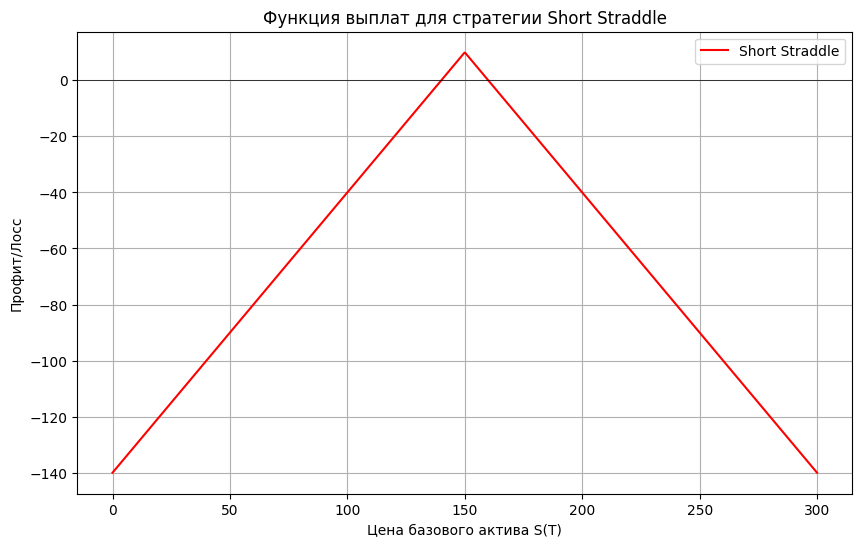

In [25]:
S0 = 150
K = 150
premium_call = 5
premium_put = 5
total_premium = premium_call + premium_put

S = np.linspace(0, 300, 1000)

payoff_short_straddle = -np.abs(S - K) + total_premium

plt.figure(figsize=(10, 6))
plt.plot(S, payoff_short_straddle, label='Short Straddle', color='red')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Цена базового актива S(T)')
plt.ylabel('Профит/Лосс')
plt.title('Функция выплат для стратегии Short Straddle')
plt.grid(True)
plt.legend()
plt.show()


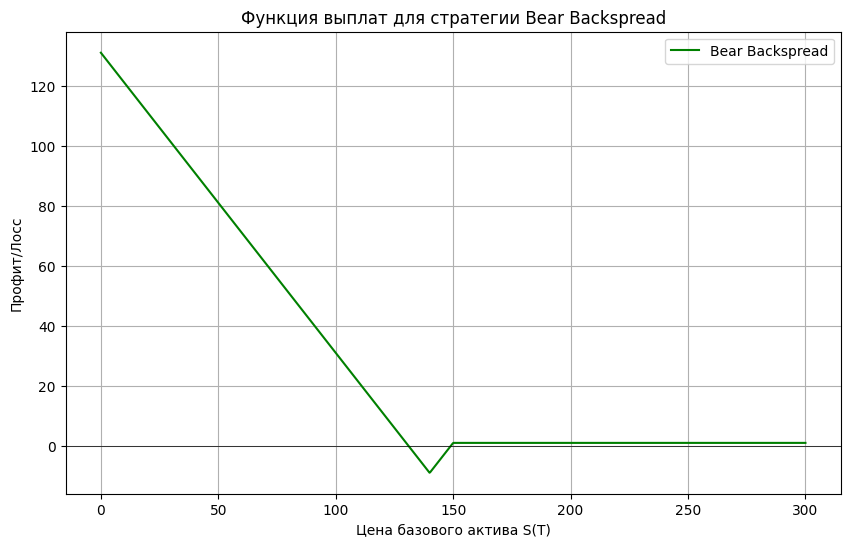

In [26]:
S0 = 150
K1 = 150 
K2 = 140 
premium_sell_put = 5
premium_buy_put = 3
net_premium = premium_sell_put - 2 * premium_buy_put 

S = np.linspace(0, 300, 1000)

payoff_sold_put = -np.maximum(K1 - S, 0)
payoff_bought_puts = 2 * np.maximum(K2 - S, 0)
payoff_bear_backspread = payoff_sold_put + payoff_bought_puts - net_premium

plt.figure(figsize=(10, 6))
plt.plot(S, payoff_bear_backspread, label='Bear Backspread', color='green')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Цена базового актива S(T)')
plt.ylabel('Профит/Лосс')
plt.title('Функция выплат для стратегии Bear Backspread')
plt.grid(True)
plt.legend()
plt.show()


Влияние соотношение спот и страйк цены


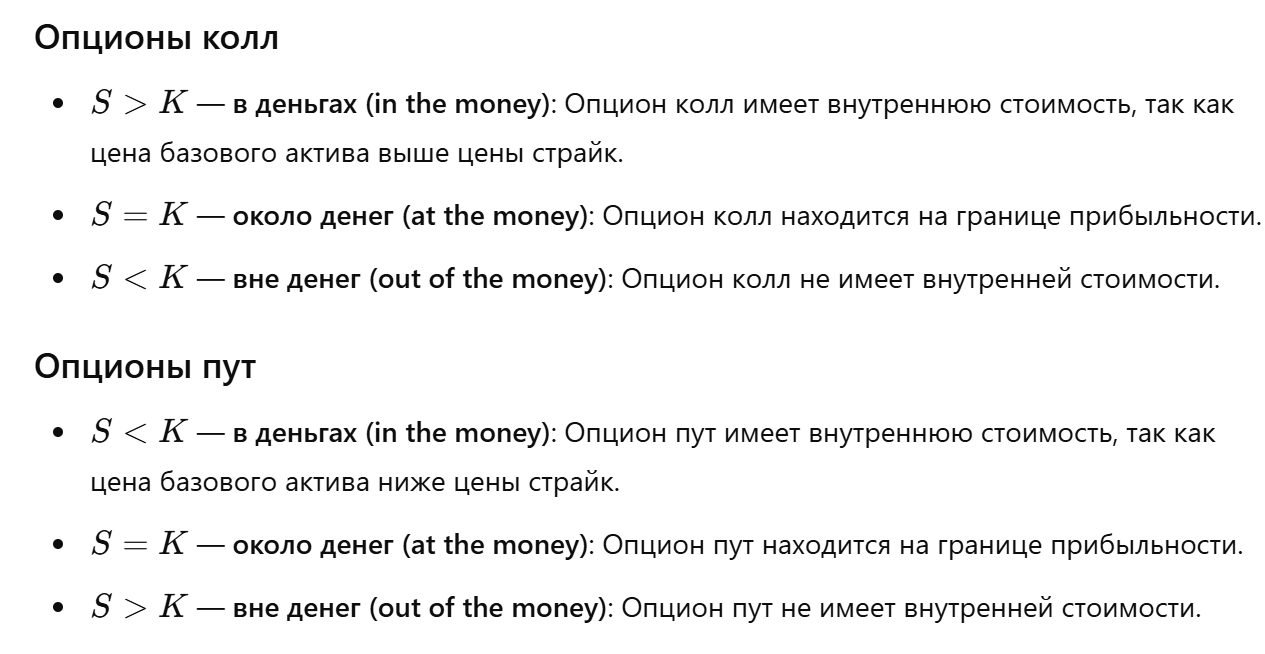

## Задача (оптимальный набор)

Задача. С использование доски опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) найдите оптимальный набор опционных контрактов $$
X=\{X_c, X_p\},
$$
где
$$
X_c=\{x_i^c \in
\mathbb{Z}: L\le x_i^c \le U, i \in I\},
$$
$$
X_p=\{x_i^p
\in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$$
здесь
$x_i^c$, $x_i^p>0$ -- количество опционов колл и пут для покупки, $x_i^c$, $x_i^p<0$ -- для продажи. Если
$x_i^c=0$ или $x_i^p=0$, то $i$-ый контракт
не входит в портфель, $L<0$ и $U>0$ -- нижняя и верхняя границы количества контрактов в портфеле соответственно,
$I=\{1,2, \ldots, n\}$ -- набор индексов.

При разработке стратегии придерживаться следующих преположений
*   покупки и продажи опционов можно осуществлять по ask- и bid-ценам,
*   можно занимать короткие и длинные позиции с учетом ликвидности контракта,
*  стратегия должна иметь защиту от падения и роста цен страйк на $x$\% от стоимости базового актива в момент времени $T$,
*  максимальный убыток стратегии ограничен величиной $\mathcal{L}$, равной $y$% от стоимости базового актива в момент времени $t=0$
*  стратегия имеет начальную стоимость $C(t,X)$, равную $w$ условных единиц капитала.

https://arxiv.org/pdf/1707.02087

In [28]:
from pulp import *
import pandas as pd
options_data = pd.DataFrame({
    'Option_Type': ['Call', 'Put'] * 5,
    'Strike': [140, 140, 145, 145, 150, 150, 155, 155, 160, 160],
    'Premium_Bid': [5, 6, 4.5, 5.5, 4, 5, 3.5, 4.5, 3, 4],
    'Premium_Ask': [5.5, 6.5, 5, 6, 4.5, 5.5, 4, 5, 3.5, 4.5],
    'Liquidity': [True]*10
})

S0 = 150  
x_percent = 0.1 
L = -10  
U = 10  
w = 0  
mathcal_L = 10  

S_min = S0 * (1 - x_percent)
S_max = S0 * (1 + x_percent)
S_range = np.linspace(S_min, S_max, 50)

x_vars = []
for idx, row in options_data.iterrows():
    x = LpVariable(f"x_{idx}", lowBound=L, upBound=U, cat='Integer')
    x_vars.append(x)

prob = LpProblem("Option_Strategy_Optimization", LpMaximize)


min_payoff = LpVariable("min_payoff")

prob += min_payoff

for S_T in S_range:
    payoff = []
    for i, row in options_data.iterrows():
        K = row['Strike']
        if row['Option_Type'] == 'Call':
            option_payoff = x_vars[i] * (max(S_T - K, 0) - (row['Premium_Bid'] if x_vars[i] >= 0 else row['Premium_Ask']))
        else:
            option_payoff = x_vars[i] * (max(K - S_T, 0) - (row['Premium_Bid'] if x_vars[i] >= 0 else row['Premium_Ask']))
        payoff.append(option_payoff)
    total_payoff = lpSum(payoff)
    prob += min_payoff <= total_payoff

prob += min_payoff >= -mathcal_L

initial_cost = []
for i, row in options_data.iterrows():
    premium = row['Premium_Ask'] if x_vars[i] >= 0 else -row['Premium_Bid']
    initial_cost.append(x_vars[i] * premium)
prob += lpSum(initial_cost) == w

prob.solve()

print("Статус решения:", LpStatus[prob.status])
print("Оптимальное значение минимальной выплаты:", value(min_payoff))
print("Рекомендуемый набор опционов:")
for i, x in enumerate(x_vars):
    if value(x) != 0:
        print(f"Контракт {i}: количество {value(x)}, Тип: {options_data.loc[i, 'Option_Type']}, Страйк: {options_data.loc[i, 'Strike']}")


Статус решения: Optimal
Оптимальное значение минимальной выплаты: 300.0
Рекомендуемый набор опционов:
Контракт 0: количество 10.0, Тип: Call, Страйк: 140
Контракт 1: количество -10.0, Тип: Put, Страйк: 140
Контракт 2: количество 10.0, Тип: Call, Страйк: 145
Контракт 3: количество -10.0, Тип: Put, Страйк: 145
Контракт 6: количество -10.0, Тип: Call, Страйк: 155
Контракт 7: количество 10.0, Тип: Put, Страйк: 155
Контракт 8: количество -10.0, Тип: Call, Страйк: 160
Контракт 9: количество 10.0, Тип: Put, Страйк: 160


Optimization Status: Infeasible

Optimal Option Positions:
Option 0 (Call Strike 150): Buy 0.0, Sell 0.0, Net 0.0
Option 1 (Call Strike 160): Buy 0.0, Sell 0.0, Net 0.0
Option 2 (Put Strike 150): Buy 6.8888889, Sell 0.0, Net 6.8888889
Option 3 (Put Strike 160): Buy 0.0, Sell -3987.6, Net 3987.6

Portfolio Payoffs:
Payoff at S_lower ($139.5): $81818.13
Payoff at S_upper ($170.5): $0.00

Maximum Loss Constraint:
Total Maximum Loss <= $31.00 (20.0%)


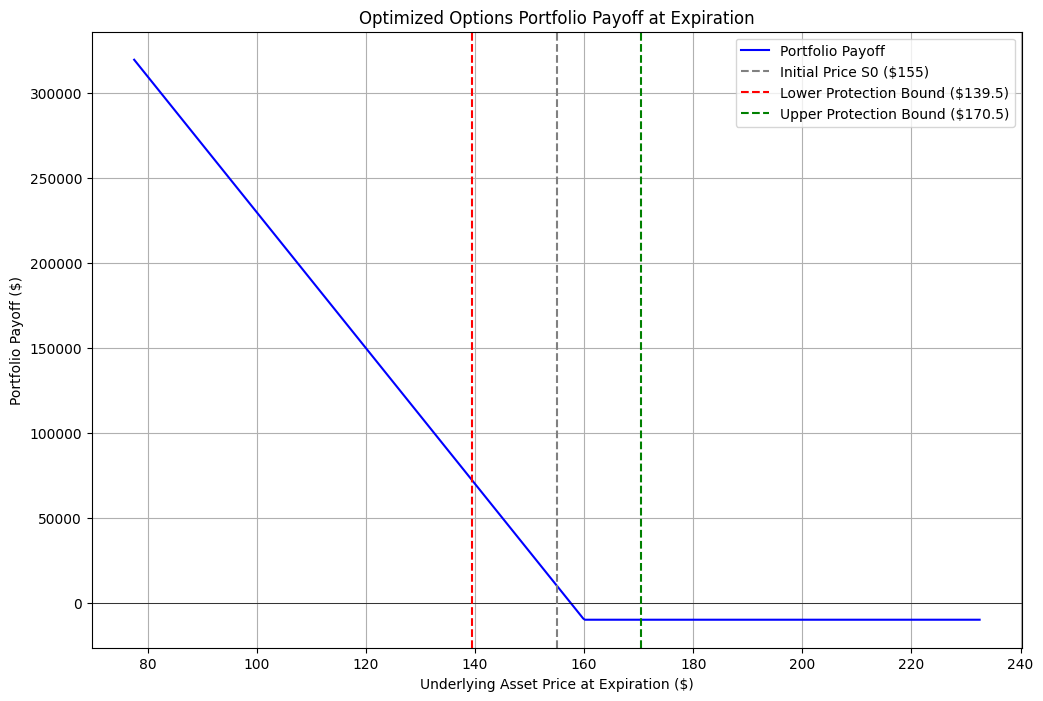

In [ ]:
import pulp

# ----------------------------
# 1. Define Option Contracts
# ----------------------------

# Columns: 'Type' ('call'/'put'), 'Strike', 'Bid', 'Ask', 'Liquidity'
options = pd.DataFrame({
    'Type': ['call', 'call', 'put', 'put'],
    'Strike': [150, 160, 150, 160],
    'Bid': [5.0, 3.0, 4.0, 2.5],
    'Ask': [5.5, 3.5, 4.5, 3.0],
    'Liquidity': [1000, 800, 1000, 800]
})

# ----------------------------
# 2. Set Parameters
# ----------------------------

S0 = 155 

x_percent = 0.10  
y_percent = 0.20  

w = 10000 

L = -10  # Minimum number of contracts (short positions)
U = 10   # Maximum number of contracts (long positions)

# ----------------------------
# 3. Calculate Protection Price Bounds
# ----------------------------

S_lower = S0 * (1 - x_percent)  # 155 * 0.9 = 139.5
S_upper = S0 * (1 + x_percent)  # 155 * 1.1 = 170.5

# ----------------------------
# 4. Initialize the Optimization Problem
# ----------------------------

prob = pulp.LpProblem("Option_Portfolio_Optimization", pulp.LpMinimize)

# ----------------------------
# 5. Define Decision Variables
# ----------------------------

buy_vars = {}
sell_vars = {}
for idx, row in options.iterrows():
    buy_var = pulp.LpVariable(f"buy_{idx}", lowBound=0, upBound=row['Liquidity'], cat='Integer')
    sell_var = pulp.LpVariable(f"sell_{idx}", lowBound=0, upBound=row['Liquidity'], cat='Integer')
    buy_vars[idx] = buy_var
    sell_vars[idx] = sell_var

# ----------------------------
# 6. Define the Objective Function
# ----------------------------

prob += 0, "Objective_Function"

# ----------------------------
# 7. Add Constraints
# ----------------------------

# 7.1. Initial Cost Constraint
# Total cost of buying options at ask prices minus revenue from selling at bid prices equals initial capital w
initial_cost = pulp.lpSum([
    buy_vars[idx] * row['Ask'] - sell_vars[idx] * row['Bid'] for idx, row in options.iterrows()
])
prob += (initial_cost == w), "Initial_Cost_Constraint"

# 7.2. Position Limits
# Net position (buy - sell) for each option must be within [L, U]
for idx, row in options.iterrows():
    net_position = buy_vars[idx] - sell_vars[idx]
    prob += (net_position >= L), f"Min_Position_{idx}"
    prob += (net_position <= U), f"Max_Position_{idx}"

# 7.3. Maximum Loss Constraint
short_call_loss = {}
short_put_loss = {}

for idx, row in options.iterrows():
    if row['Type'] == 'call':
        aux_var = pulp.LpVariable(f"short_call_loss_{idx}", lowBound=0, cat='Continuous')
        short_call_loss[idx] = aux_var
        prob += (aux_var == (S_upper - row['Strike']) * sell_vars[idx]), f"Short_Call_Loss_{idx}"
    elif row['Type'] == 'put':
        aux_var = pulp.LpVariable(f"short_put_loss_{idx}", lowBound=0, cat='Continuous')
        short_put_loss[idx] = aux_var
        prob += (aux_var == (row['Strike'] - S_lower) * sell_vars[idx]), f"Short_Put_Loss_{idx}"

long_call_cost = pulp.lpSum([
    buy_vars[idx] * row['Ask'] for idx, row in options.iterrows() if row['Type'] == 'call'
])
long_put_cost = pulp.lpSum([
    buy_vars[idx] * row['Ask'] for idx, row in options.iterrows() if row['Type'] == 'put'
])
total_short_loss = pulp.lpSum([
    short_call_loss[idx] for idx in short_call_loss
]) + pulp.lpSum([
    short_put_loss[idx] for idx in short_put_loss
])

prob += (long_call_cost + long_put_cost + total_short_loss <= y_percent * S0), "Maximum_Loss_Constraint"

# 7.4. Protection Constraints

payoff_lower = pulp.LpVariable("payoff_lower", cat='Continuous')
payoff_upper = pulp.LpVariable("payoff_upper", cat='Continuous')

# Calculate payoffs at S_lower
payoff_lower_expr = []
for idx, row in options.iterrows():
    K = row['Strike']
    if row['Type'] == 'call':
        # Payoff: max(S_lower - K, 0) * buy_vars[idx] - max(S_lower - K, 0) * sell_vars[idx]
        if S_lower > K:
            payoff = (S_lower - K) * buy_vars[idx] - (S_lower - K) * sell_vars[idx]
            payoff_lower_expr.append(payoff)
        else:
            payoff_lower_expr.append(0)
    elif row['Type'] == 'put':
        # Payoff: max(K - S_lower, 0) * buy_vars[idx] - max(K - S_lower, 0) * sell_vars[idx]
        payoff = (row['Strike'] - S_lower) * buy_vars[idx] - (row['Strike'] - S_lower) * sell_vars[idx]
        payoff_lower_expr.append(payoff)

prob += (payoff_lower == pulp.lpSum(payoff_lower_expr)), "Payoff_Lower_Bound"

payoff_upper_expr = []
for idx, row in options.iterrows():
    K = row['Strike']
    if row['Type'] == 'call':
        # Payoff: max(S_upper - K, 0) * buy_vars[idx] - max(S_upper - K, 0) * sell_vars[idx]
        payoff = (S_upper - K) * buy_vars[idx] - (S_upper - K) * sell_vars[idx]
        payoff_upper_expr.append(payoff)
    elif row['Type'] == 'put':
        # Payoff: max(K - S_upper, 0) * buy_vars[idx] - max(K - S_upper, 0) * sell_vars[idx]
        if row['Strike'] > S_upper:
            payoff = (row['Strike'] - S_upper) * buy_vars[idx] - (row['Strike'] - S_upper) * sell_vars[idx]
            payoff_upper_expr.append(payoff)
        else:
            payoff_upper_expr.append(0)

# Set the payoff_upper variable
prob += (payoff_upper == pulp.lpSum(payoff_upper_expr)), "Payoff_Upper_Bound"

# Protection Constraints: Ensure payoffs are non-negative
prob += (payoff_lower >= 0), "Protection_Lower_Bound"
prob += (payoff_upper >= 0), "Protection_Upper_Bound"

# ----------------------------
# 8. Solve the Optimization Problem
# ----------------------------

prob.solve()

# ----------------------------
# 9. Retrieve and Display Results
# ----------------------------

print("Optimization Status:", pulp.LpStatus[prob.status])

print("\nOptimal Option Positions:")
positions = {}
for idx, row in options.iterrows():
    buy = buy_vars[idx].varValue
    sell = sell_vars[idx].varValue
    net_position = buy - sell
    positions[idx] = net_position
    print(f"Option {idx} ({row['Type'].capitalize()} Strike {row['Strike']}): Buy {buy}, Sell {sell}, Net {net_position}")

payoff_lower_value = payoff_lower.varValue
payoff_upper_value = payoff_upper.varValue
print("\nPortfolio Payoffs:")
print(f"Payoff at S_lower (${S_lower}): ${payoff_lower_value:.2f}")
print(f"Payoff at S_upper (${S_upper}): ${payoff_upper_value:.2f}")

max_loss_allowed = y_percent * S0
print("\nMaximum Loss Constraint:")
print(f"Total Maximum Loss <= ${max_loss_allowed:.2f} ({y_percent*100}%)")

# ----------------------------
# 10. Compute and Plot the Portfolio Payoff
# ----------------------------

price_range = np.linspace(S0 * 0.5, S0 * 1.5, 500)  # From $77.5 to $232.5

portfolio_payoffs = []

for S_T in price_range:
    total_payoff = 0
    for idx, row in options.iterrows():
        K = row['Strike']
        position = positions[idx]
        if row['Type'] == 'call':
            payoff = max(S_T - K, 0) * position
        elif row['Type'] == 'put':
            payoff = max(K - S_T, 0) * position
        total_payoff += payoff
    # Subtract the initial cost (premium paid)
    total_payoff -= (w)
    portfolio_payoffs.append(total_payoff)

plt.figure(figsize=(12, 8))
plt.plot(price_range, portfolio_payoffs, label='Portfolio Payoff', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(S0, color='gray', linestyle='--', label=f'Initial Price S0 (${S0})')
plt.axvline(S_lower, color='red', linestyle='--', label=f'Lower Protection Bound (${S_lower})')
plt.axvline(S_upper, color='green', linestyle='--', label=f'Upper Protection Bound (${S_upper})')

plt.title('Optimized Options Portfolio Payoff at Expiration')
plt.xlabel('Underlying Asset Price at Expiration ($)')
plt.ylabel('Portfolio Payoff ($)')
plt.legend()
plt.grid(True)
plt.show()
